# Pantograph model

Math 502 - Winter 2019

An electric train, with overhead wires to supply power, has a **pantograph** on top, which is a spring-loaded lever that reaches up to touch the wire.

<img src="images/Pantograph.png" width=300 />

We are looking for solution to a wave equation in the form 

$$\frac{\partial^2 y}{\partial t^2} -   \frac{\partial^2 y}{\partial x^2} = 
f(t)\delta(x-ut) - \alpha,$$
where $\alpha$ is a small parameter (a ratio of forces) and $f(t) = f_0 - f_1Y(t) - f_2 Y'(t)$ is the linear, damped spring. Boundary conditions are
$$y(0,t) = 0 = y(1,t).$$
Initial condition is
$$y(x,0) = \frac{\alpha}{2}x(1-x).$$


We want to describe the mathematics of such a setup, which is important for high speed trains. For instance,  we need to know the wires don't start oscillating madly and fall off their supports, or disconnect from the train, or maybe make waves that reflect off the supports and do strange things. 

You should read about this model in Howison, Chapter 11. ("Practical Applied Mathematics.")

You can read his Howison's text online here : [people.maths.ox.ac.uk/fowler/courses/tech/sdh.pdf](https://people.maths.ox.ac.uk/fowler/courses/tech/sdh.pdf)

You may also read Chapeter 9 and 10, about **distributions** such as the Dirac delta function. 


In [1]:
from numpy import *
from matplotlib.pyplot import *
from ipywidgets import interact

## Summary of previous lecture

In the last lecture, we set up the differential equation, boundary conditions and initial conditions. Then we non-dimensionalized everything. 

The nondimensionalized version is written as
$$\frac{\partial^2 y}{\partial t^2} -   \frac{\partial^2 y}{\partial x^2} = 
f(t)\delta(x-ut) - \alpha,$$
where $\alpha$ is a small parameter (a ratio of forces) and $f(t) = f_0 - f_1Y(t) - f_2 Y'(t)$ is the linear, damped spring. Boundary conditions are
$$y(0,t) = 0 = y(1,t).$$
Initial condition is
$$y(x,0) = \frac{\alpha}{2}x(1-x).$$


### Distribution

The first thing we have to deal with is the delta function $\delta(x-ut)$ that appears in the PDE. The important thing to note is that it has a "direction" associated to it, because of the argument $x-ut$. Now, the second derivative of the PDE has a delta function, so some first derivative will have a jump, and the 0-th derivative (i.e. the desired function $y(x,t)$ will have a discontinuity in its slope, in some direction. 

The point is, the direction matters. For instance, if you are skiing down a hill and at the bottom of the hill, the slope suddenly changes from 45 degrees to flat, it really matters at what direction you hit this "crease" in the hillside. If you hit it straight on, you feel a big bump; if you hit it at an angle, the bump is not so bad.

So we have to deal with this direction determined by $x-ut$ in some mathematical way.

One way to do this is to choose a new variable $\xi = x-ut$ and describe the PDE in terms of a new function 
$$g(\xi, t) = y(x,t) \mbox{ where } \xi = x-ut$$
is our new change of variables.

We can compute the derivatives of $y$ using the chain rule, so
$$\frac{\partial y}{\partial x} = \frac{\partial g}{\partial \xi}\frac{\partial \xi}{\partial x} 
+ \frac{\partial g}{\partial t}\frac{\partial t}{\partial x}
= \frac{\partial g}{\partial \xi},$$
since $\frac{\partial \xi}{\partial x} = \frac{\partial (x-ut)}{\partial x} = 1$  while $\frac{\partial t}{\partial x} = 0$. We also then have
$$\frac{\partial^2 y}{\partial x^2} = \frac{\partial^2 g}{\partial \xi^2}.$$

The t derivatives are a bit more interesting, so 
$$\frac{\partial y}{\partial t} = \frac{\partial g}{\partial \xi}\frac{\partial \xi}{\partial t} 
+ \frac{\partial g}{\partial t}\frac{\partial t}{\partial t} = -u \frac{\partial g}{\partial \xi} + \frac{\partial g}{\partial t}.$$
Repeating this we get
$$\frac{\partial^2 y}{\partial t^2} = -u \frac{\partial }{\partial t}(\frac{\partial g}{\partial \xi}) + 
\frac{\partial }{\partial t}(\frac{\partial g}{\partial t})
= -u(-u\frac{\partial^2 g}{\partial \xi^2} + \frac{\partial^2 g}{\partial \xi \partial t}) +
(-u \frac{\partial^2 g}{\partial t \partial \xi }+ \frac{\partial^2 g}{\partial t^2  }) ,$$ 
and grouping common terms gives
$$\frac{\partial^2 y}{\partial t^2} = u^2\frac{\partial^2 g}{\partial \xi^2} 
-2u \frac{\partial^2 g}{\partial t \partial \xi} + \frac{\partial^2 g}{\partial t^2} $$

So now the original PDE becomes
$$\frac{\partial^2 y}{\partial t^2} - \frac{\partial^2 y}{\partial x^2} =
\frac{\partial^2 g}{\partial t^2}  -2u \frac{\partial^2 g}{\partial t \partial \xi} 
- (1-u^2) \frac{\partial^2 g}{\partial \xi^2} = f(t) \delta(\xi),$$
where we have changed variables in the forcing term $f(t)\delta(x-ut) = f(t) \delta(\xi)$.

So we see the second derivative of $g$ will have a delta function in the $\xi$ direction, so to first order we can write
$$- (1-u^2) \frac{\partial^2 g}{\partial \xi^2} = f(t) \delta(\xi).$$
This tells us that the first derivative $\frac{\partial g}{\partial \xi}$ will have a jump discontinuity of size $-\frac{1}{1-u^2}f(t)$. Going back to our original variables, we get a jump discontinuity of this size across the line $x = ut$, so we can write
$$\left[ \frac{\partial y}{\partial x} \right]_{x=ut-}^{x=ut+} = -\frac{1}{1-u^2}f(t).$$

We will use this jump condition when we are solving the PDE for the wire.

## Regions for the solution.

Keep in mind we have a wave equation. The general solution for the wave equation, if there is no forcing term, is just of the form
$$y(x,t) = g(x-t) + h(x+t)$$
where the g represents a right-going wave, and h represents a left-going wave. If you haven't seen this before, you should just check (using the chain rule) that this function $y(x,t) = g(x-t) + h(x+t)$ satisfies the wave equation
$$\frac{\partial^2 y}{\partial t^2} - \frac{\partial^2 y}{\partial x^2} = 0.$$

This is called d'Alembert's solution, by the way.

So, when we are away from the supports, and away from the pole touching the wire (which is a force), we can use these left/right going waves for our solution. At the pole touching the wire, we have to glue together functions using the jump condition.

It is convenient to divide up the solution space (in the x-t plane) into a region in front of the train, and a region to the left of the train.

I should insert a picture here, but let's draw a graph instead, to show the regions. 

The region between the blue lines $x=\pm t$ forms the "light cone" where the wave function $y(x,t)$ can be non-zero. The red line $x = ut$ represents the path of the train. The region to the right of the red line, we call region 1, and it represents the wire in front of the train. The region to the left of the red line, we call region 2, and it represents the wire behind the train. 



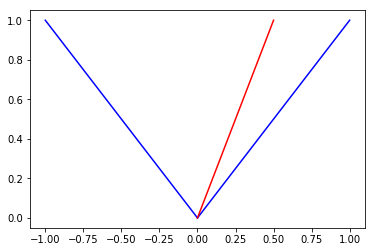

In [11]:
u = .5
plot([0,1],[0,1],'b');
plot([0,-1],[0,1],'b');
plot([0,u],[0,1],'r');



## Solution 1. Initial contact of pole to wire.

Let's see what happens when the pole first touches the wire. Ignore gravity (we can always add it later, as this is a linear PDE), so our initial condition is $y(x,t=0) = 0.$ Let's also assume we are far away from the supports, so we can see what happens as the pole touches the wire. 

Let's start the pole at the point $x=0$ (again, there are no supports, so no boundary condition now).

We can solve the wave equation in region 1 as a wave going to the right, and in region 2 as a wave going to the left. (That is, the wave starts at the pantograph, and information only travels away from the pantograph/train.) So we write
$$y(x,t) = 
\left\{
	\begin{array}{ll}
		g(t-x)  & \mbox{ in region 1 }  \\
		h(t+x) & \mbox{ in region 2. }
	\end{array}
\right.
$$
Along the light cone $x = \pm t$, the solution has to be zero, so we know that
$$g(0) = h(0) = 0.$$

At $x=ut$, continuity of the solution $y(x,t)$ tells us that those two functions must agree there, so
$$g(t-ut) = h(t+ut).$$
If we differential this we find $(1-u)g'(t-ut) = (1+u)h'(t+ut).$
The jump condition on $\partial y/\partial x$ across this same line tells us that
$$-g'(t-ut) -h'(t+ut) = -\frac{1}{1-u^2} f(t),$$
and using the previous equation we can eliminate $h'$ to get
$$-g'(t-ut) - \frac{1-u}{1+u}g'(t-ut) = -\frac{1}{1-u^2} f(t).$$
A bit of algebra simplifies this to
$$g'(t-ut) = \frac{1}{2(1-u)} f(t). \mbox{ ** } $$

Now we should work out what the force term is, $f(t) = f_0 -f_1Y(t) - f_2 \frac{dY}{dt}$, where $Y(t) = y(ut,t).$
We, we know then that $Y(t) = g(t-ut)$ and so $\frac{dY}{dt} = (1-u) g'(t-ut).$
We plug this into the equation (**) above to get 

$$g'(t-ut) = \frac{1}{2(1-u)} \left[ f_0 - f_1g(t-ut) - (1-u)f_2 g'(t-ut) \right].$$

Looking carefully at this, we see this is just a linear, first order ODE. We can rewrite it as
$$g' = \frac{-f_1g -f_0}{(1-u)(2+f_2)}.$$

The solution will be an exponential plus a constant, and remembering the initial condition $g(0)=)$ we can solve as
$$g(t) = \frac{f_0}{f_1}(e^{-kt} - 1),$$
where the decay constant k is
$$k = \frac{f_1}{(1-u)(2+f_2)}.$$

We notice in the limit $t\rightarrow \infty$ has $g$ a limiting value of  $-\frac{f_0}{f_1}$, which corresponds to the force $f(t) = f_0 -f_t g - f_2(1-u)g'$ leveling out at $f=0$. So the  pantograph lifts the wire until the total force is zero. In most real cases, though, we will hit a support long before this happens.


## Solution 2. Train passing a support.

Now we see what happens when the pantograph passes a support. The key diffference in this setting is that in region 2, you can have waves going both left (away from the train) and right (a reflection off the support). IN region 1, you still just have the wave going to the right. So we can write:$$y(x,t) = 
\left\{
	\begin{array}{ll}
		g_1(t-x)  & \mbox{ in region 1 }  \\
		g_2(t-x) + h_2(t+x) & \mbox{ in region 2. }
	\end{array}
\right.
$$

At $x=ut$, continuity of the solution $y(x,t)$ tells us that those two functions must agree in regions 1 and 2, so
$$g_1(t-ut) = g_2(t-x) + h_2(t+ut). \qquad \mbox{ Eqn 1.} $$

The jump condition on $\partial y/\partial x$ across this same line tells us that
$$-g_1'(t-ut) +g_2'(t-ut) -h_2'(t+ut) = -\frac{1}{1-u^2} f(t),$$
and plugging in $Y(y) = g_1(t-ut)$ into the force there $f(t)$ we get
$$-g_1'(t-ut) +g_2'(t-ut) -h_2'(t+ut) = -\frac{1}{1-u^2} \left( f_0 - f_1g_1(t-ut) - f_2 (1-u)g'_1(t-ut) \right).
\qquad \mbox{ Eqn 2.}$$

The rigid support at $x=0$ tells us that $y(0,t) = 0$ for all times, so we have the condition
$$g_2(t) + h_2(t) = 0. \qquad \mbox{ Eqn 3.}

This is three equations in three unknown functions ($g_1,g_2,h_2$) so we can eliminate two of them and get left with one differential equation in just one function:
$$(1+u)(2+f_2) g'_2(t+ut) + f_1g_2(t+ut) = -f_0 + f_1g_2(t-ut) + (1-u)f_2g'_2(t-ut).$$
Notice the function $g_2$ is evaluated at two places here, both $t-ut$ and $t+ut$. This makes the equation a **delay differential equation.**

It is also known in the literature as a pantograph equation. 

Solving this is hard. Howison suggests looking at the special case where $f_1 = 0$. (This means our pantograph is not really a spring, but applies a constant force plus damping. Can you think how you might build such a thing?)

For the case $f_1 = 0$ we get the equation 
$$(1+u)(2+f_2) g'_2(t+ut)  = -f_0  + (1-u)f_2g'_2(t-ut).$$
Integrate this once, with respect to t, to get
$$(2+f_2) g_2(t+ut)  = -f_0t  + f_2g_2(t-ut).$$
Looking at this, it says the difference in $g$, evaluated at two places $t\pm ut$, and wieghted, is a linear function $f_0t$. Can we solve this?

A good guess is a linear function, such as $g(t) = at,$ for some constant $a$. Plug this in to the above equation, we have
$$(2+f_2)a(t+ut) = -f_0t + f_2 a(t-ut).$$
Cancel the t's, and we get
$$(2+f_2)a(1+u) = -f_0 + f_2 a(1-u).$$
And yes, we can solve for $a$ to get
$$a = \frac{-f_0}{2(1 + u + uf_2)}.$$

So we have a solution for $g_2(t) = at.$ We should check that this is the only solution to the algebraic equation above (Howison shows how, if you want to see that.) I'm happy enough with a solution. 

And, since we know $g_2$, then we know $h_2$ and $g_1$ from the equations above. It turns out they are all linear. So the solution to our wave equation is piecewise linear, which is pretty neat.

But keep in mind this is assuming the simplified model with $f_1 = 0$. 


In the next lecture, we will plot this. 


## Solution 3. The full span. 

It would be very interesting to solve the wave equation, taking into account multiple reflections off the supports on the left and the right of the train. The issue is that any discontinuities due to the pantograph touching the wire will travel along a charateristic line of slope $\pm 1$, and this reflections can "build up" as the train approaches a support. We can see this in the following diagram, where the dotted lines represent the paths where the signal from the pantograph travels, including its reflections. 


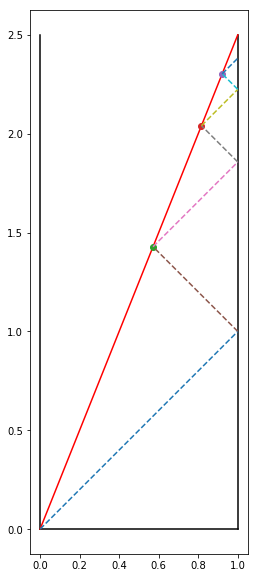

In [51]:
u = .4
mu = (1-u)/(1+u)
x1 = (1-mu)
x2 = (1-mu**2)
x3 = (1-mu**3)
t1 = x1/u
t2 = x2/u
t3 = x3/u
fig, ax = subplots(figsize=(20, 10))
plot([0,0],[0,1/u],'k');
plot([0,1],[0,0],'k');
plot([1,1],[0,1/u],'k');
plot([0,1],[0,1/u],'r');
plot([0,1],[0,1],'--');
plot([1,1],[1,1],'--');
plot(x1,t1,'o');
plot(x2,t2,'o');
plot(x3,t3,'o');
plot([1,x1],[1,t1],'--')
plot([x1,1],[t1,1 + (1-u)*t1],'--')
plot([1,x2],[1 + (1-u)*t1,t2],'--')
plot([x2,1],[t2,1 + (1-u)*t2],'--')
plot([1,x3],[1 + (1-u)*t2,t3],'--')
plot([x3,1],[t3,1 + (1-u)*t3],'--')
ax.set_aspect(aspect='equal')


## Geometry

This is just a bit of geometry to follow the reflections. You might like to work this out for yourself. Just follow the lines of slope plus and minus one. 

The possible discontinuities happen at the circles on the red line. This corresponds to the x values of 
$$x_n = 1- \mu^n$$ and the corresponding time values are 
$$t_n = \frac{1}{u}(1-\mu^n). $$

Here, $\mu = (1-u)/(1+u).$

It's interesting that Howison sort of gives up on solving the whole problem. Maybe it is left for us as an exercise. This is certainly do0able. (Between the discontinuities, there is just the usual wave equation. So you can solve there, and piece together the parts.)

What he does instead is solve for the force term $f(t) = f_0 -f_2dY/dt$ and discovers that is is piecewise continuous, and piecewise linear. The jump conditions become
$$
\left[ f(t) \right]_{t_n-}^{t_n+} = \frac{f_2}{\mu(2+f_2)}\left[ f(t) \right]_{t_{n-1}-}^{t_{n-1}+}.$$
and the derivatives change like this:
$$\left[ \frac{df}{dt} \right]_{t_n-}^{t_n+} = \frac{f_2}{\mu^2(2+f_2)}\left[ \frac{df}{dt} \right]_{t_{n-1}-}^{t_{n-1}+}.$$
You can solve this easily (you just get powers of those constants in the equations), and everything works out finitely provided
$$\frac{f_2}{\mu(2+f_2)} <1.$$
